In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Kannada-MNIST/sample_submission.csv
/kaggle/input/Kannada-MNIST/Dig-MNIST.csv
/kaggle/input/Kannada-MNIST/train.csv
/kaggle/input/Kannada-MNIST/test.csv


In [2]:
import torch
from torch import nn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_csv("/kaggle/input/Kannada-MNIST/train.csv")
test_df = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")
valid_df = pd.read_csv("/kaggle/input/Kannada-MNIST/Dig-MNIST.csv")

# Principal component Analysis

In [8]:
pca_train=PCA(n_components=4,whiten=True)
pca_train.fit(train_df.drop('label',axis=1))

PCA(n_components=4, whiten=True)

In [9]:
transformed=pca_train.transform(train_df.drop('label',axis=1))
pd_transform=pd.DataFrame(transformed)
pd_transform

,0,1,2,3
0,1.369109,-0.722042,0.089597,-1.080143
1,0.677439,-0.264812,0.160994,-1.839496
2,-0.965913,1.754151,1.314634,-0.511224
3,-0.780289,0.273291,-1.261046,-0.028496
4,-0.217992,0.009662,-1.566395,0.420814
...,...,...,...,...
59995,-0.478651,1.043593,2.247564,0.485581
59996,-0.934635,0.123977,0.385462,-0.689514
59997,-1.290993,0.016143,1.426888,-1.177705
59998,1.751402,-0.287167,0.898921,1.543811


In [10]:
original_transform=pca_train.inverse_transform(transformed)
pd_original=pd.DataFrame(original_transform)
pd_original

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-2.632260e-14,-2.327798e-14,1.152405e-14,-1.129218e-14,2.784594e-15,0.003758,0.013373,-0.002050,0.002148,0.027825,...,0.030028,0.027093,0.018093,0.033973,0.026796,0.001121,0.007821,0.0,-0.000361,0.0
1,-1.180922e-14,-4.485652e-14,2.002038e-14,-1.979832e-14,4.885898e-15,0.016200,0.053112,0.029252,0.081593,0.149922,...,0.032634,0.019579,0.008045,0.018933,0.025394,-0.000101,0.008838,0.0,0.002522,0.0
2,1.255769e-14,-3.559412e-14,6.099907e-15,-7.318821e-15,1.971600e-15,0.037665,0.126654,0.157044,0.338793,0.513554,...,0.016094,0.023860,0.019499,0.033263,0.019741,0.001766,0.001730,0.0,0.005289,0.0
3,4.953977e-14,1.187803e-14,6.344118e-16,3.066521e-16,-2.316788e-16,0.007838,0.014665,0.009463,0.030032,0.023618,...,0.011903,-0.005066,-0.006540,-0.011708,-0.003248,-0.000321,0.003778,0.0,0.007350,0.0
4,4.860347e-14,2.762901e-14,-4.346677e-15,5.500960e-15,-1.547014e-15,-0.001857,-0.019615,-0.022936,-0.043176,-0.093173,...,0.011089,-0.001846,-0.001682,-0.004646,-0.003166,0.000301,0.003315,0.0,0.005821,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-3.936348e-14,-1.845129e-14,-5.267844e-15,3.267315e-15,-5.181780e-16,0.028874,0.111394,0.164297,0.324033,0.508988,...,0.010658,0.040169,0.038432,0.062784,0.025783,0.003888,0.000023,0.0,0.000304,0.0
59996,-3.409374e-15,-2.197815e-14,7.543634e-15,-7.765554e-15,1.955742e-15,0.021603,0.076718,0.078694,0.167255,0.268592,...,0.016259,0.009063,0.003401,0.007244,0.010306,0.000199,0.004916,0.0,0.005006,0.0
59997,-3.608095e-14,-4.513501e-14,1.267684e-14,-1.362482e-14,3.523972e-15,0.032093,0.122724,0.127879,0.265606,0.442457,...,0.018240,0.014995,0.006518,0.014043,0.016985,0.000226,0.005761,0.0,0.004168,0.0
59998,-4.541181e-14,2.934572e-14,-1.718583e-14,1.629842e-14,-3.893130e-15,-0.007677,-0.018260,0.025425,0.020361,0.035320,...,0.012641,0.048620,0.050202,0.080382,0.027198,0.005305,0.000448,0.0,-0.005089,0.0


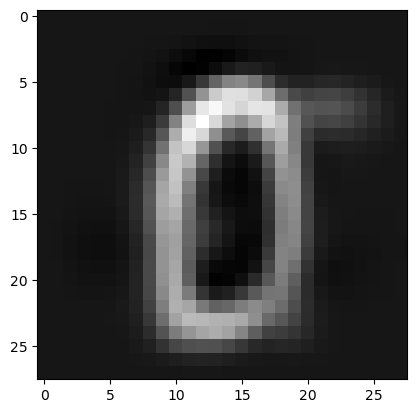

In [11]:
plt.imshow(pd_original[0:1].to_numpy().reshape(28,28),cmap="gray")

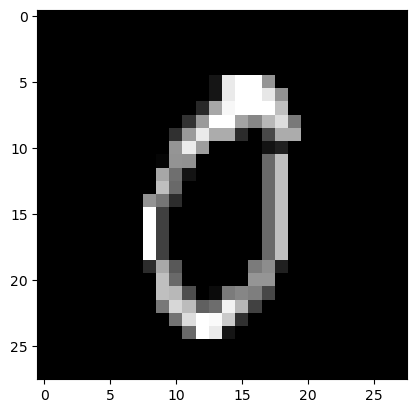

In [12]:
plt.imshow(train_df.drop('label',axis=1)[0:1].to_numpy().reshape(28,28),cmap="gray")

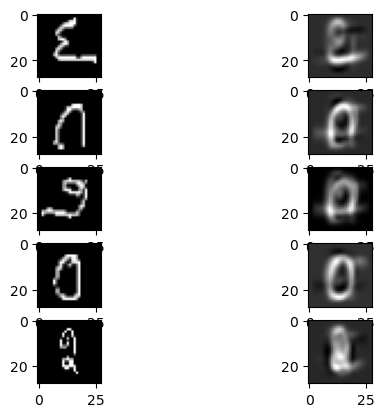

In [13]:
import random

n = 5
fig, ax = plt.subplots(n,2)
for i in range(n):
   x = random.randint(0, 783)
   ax[i, 0].imshow(train_df.drop('label',axis=1)[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
   ax[i, 1].imshow(pd_original[x : x+1].to_numpy().reshape(28, 28), cmap= 'gray')
plt.show()

# Autoencoder

In [14]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,Dataset
import torch.optim as optim
from tqdm import tqdm

In [15]:
class Autoencoder(nn.Module):
    def __init__(self, k):
        super(Autoencoder, self).__init__()
        self.encoder_layer1 = nn.Linear(784, 500)
        self.encoder_layer2 = nn.Linear(500, 250)
        self.encoder_layer3 = nn.Linear(250, k)

        self.decoder_layer1 = nn.Linear(k, 250)
        self.decoder_layer2 = nn.Linear(250, 500)
        self.decoder_layer3 = nn.Linear(500, 784)

    def forward(self, x):
        encoded = self.encoder_layer1(x)
        encoded = self.encoder_layer2(encoded)
        encoded = self.encoder_layer3(encoded)

        decoded = self.decoder_layer1(encoded)
        decoded = self.decoder_layer2(decoded)
        decoded = self.decoder_layer3(decoded)

        return decoded

In [16]:
class KanadaMnist(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csv_file)
        self.pixels = self.data.iloc[:, 1:].values.astype(float)/255.0

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        pixels = self.pixels[idx]
        return torch.tensor(pixels, dtype=torch.float32)

In [17]:
train_data=KanadaMnist("/kaggle/input/Kannada-MNIST/train.csv")
test_data=KanadaMnist("/kaggle/input/Kannada-MNIST/test.csv")

In [18]:
k=4
autoencoderModel=Autoencoder(k)
autoencoderModel

Autoencoder(
  (encoder_layer1): Linear(in_features=784, out_features=500, bias=True)
  (encoder_layer2): Linear(in_features=500, out_features=250, bias=True)
  (encoder_layer3): Linear(in_features=250, out_features=4, bias=True)
  (decoder_layer1): Linear(in_features=4, out_features=250, bias=True)
  (decoder_layer2): Linear(in_features=250, out_features=500, bias=True)
  (decoder_layer3): Linear(in_features=500, out_features=784, bias=True)
)

In [19]:
batch_size=64
train=DataLoader(train_data,batch_size=batch_size,shuffle=True)
test=DataLoader(test_data,batch_size=batch_size,shuffle=True)

In [20]:
learning_rate=0.001
num_epochs=20

loss_fn=nn.MSELoss()
optimizer=optim.AdamW(autoencoderModel.parameters(),lr=learning_rate)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
autoencoderModel.to(device)

Autoencoder(
  (encoder_layer1): Linear(in_features=784, out_features=500, bias=True)
  (encoder_layer2): Linear(in_features=500, out_features=250, bias=True)
  (encoder_layer3): Linear(in_features=250, out_features=4, bias=True)
  (decoder_layer1): Linear(in_features=4, out_features=250, bias=True)
  (decoder_layer2): Linear(in_features=250, out_features=500, bias=True)
  (decoder_layer3): Linear(in_features=500, out_features=784, bias=True)
)

In [21]:
num_batches = len(train_df) // batch_size

for epoch in range(num_epochs):
    total_loss = 0.0
    progress_bar = tqdm(range(num_batches), desc=f"Epoch [{epoch+1}/{num_epochs}]")

    autoencoderModel.train()  # Set the model to training mode
    for batch_idx in progress_bar:
        batch_start = batch_idx * batch_size
        batch_end = (batch_idx + 1) * batch_size

        batch_inputs = train_data[batch_start:batch_end].to(device)  # Move data to GPU
        optimizer.zero_grad()

        batch_outputs = autoencoderModel(batch_inputs)
        reconstruction_loss = loss_fn(batch_outputs, batch_inputs)
        reconstruction_loss.backward()
        optimizer.step()

        total_loss += reconstruction_loss.item() * batch_inputs.size(0)
        average_loss = total_loss / (batch_idx + 1) * batch_size

        progress_bar.set_postfix({"Avg Loss": f"{average_loss:.4f}"})

    progress_bar.close()
    autoencoderModel.eval()
    test_loss = 0.0
    with torch.no_grad():
        for test_batch in test_data:
            test_inputs = test_batch.to(device)
            test_outputs = autoencoderModel(test_inputs)
            test_loss += loss_fn(test_outputs, test_inputs).item() * test_inputs.size(0)

    average_test_loss = test_loss / len(test_df)
    print(f"Epoch [{epoch+1}/{num_epochs}], Test Loss: {average_test_loss:.4f}")

Epoch [1/20]: 100%|██████████| 937/937 [00:06<00:00, 146.92it/s, Avg Loss=154.8148]


Epoch [1/20], Test Loss: 29.0623


Epoch [2/20]: 100%|██████████| 937/937 [00:03<00:00, 270.12it/s, Avg Loss=167.8035]


Epoch [2/20], Test Loss: 28.8920


Epoch [3/20]: 100%|██████████| 937/937 [00:03<00:00, 265.14it/s, Avg Loss=153.9472]


Epoch [3/20], Test Loss: 28.4056


Epoch [4/20]: 100%|██████████| 937/937 [00:03<00:00, 269.10it/s, Avg Loss=153.4734]


Epoch [4/20], Test Loss: 28.3682


Epoch [5/20]: 100%|██████████| 937/937 [00:03<00:00, 261.78it/s, Avg Loss=153.4416]


Epoch [5/20], Test Loss: 28.2262


Epoch [6/20]: 100%|██████████| 937/937 [00:03<00:00, 269.03it/s, Avg Loss=153.3865]


Epoch [6/20], Test Loss: 28.2339


Epoch [7/20]: 100%|██████████| 937/937 [00:03<00:00, 270.08it/s, Avg Loss=153.2294]


Epoch [7/20], Test Loss: 28.2141


Epoch [8/20]: 100%|██████████| 937/937 [00:03<00:00, 270.59it/s, Avg Loss=216.6629]


Epoch [8/20], Test Loss: 32.4985


Epoch [9/20]: 100%|██████████| 937/937 [00:03<00:00, 272.69it/s, Avg Loss=155.8324]


Epoch [9/20], Test Loss: 28.2861


Epoch [10/20]: 100%|██████████| 937/937 [00:03<00:00, 243.39it/s, Avg Loss=153.8332]


Epoch [10/20], Test Loss: 28.2568


Epoch [11/20]: 100%|██████████| 937/937 [00:03<00:00, 271.24it/s, Avg Loss=153.7383]


Epoch [11/20], Test Loss: 28.2788


Epoch [12/20]: 100%|██████████| 937/937 [00:03<00:00, 264.96it/s, Avg Loss=153.7893]


Epoch [12/20], Test Loss: 28.2890


Epoch [13/20]: 100%|██████████| 937/937 [00:03<00:00, 273.37it/s, Avg Loss=153.6944]


Epoch [13/20], Test Loss: 28.2688


Epoch [14/20]: 100%|██████████| 937/937 [00:03<00:00, 263.84it/s, Avg Loss=153.5440]


Epoch [14/20], Test Loss: 28.1968


Epoch [15/20]: 100%|██████████| 937/937 [00:03<00:00, 271.93it/s, Avg Loss=153.4279]


Epoch [15/20], Test Loss: 28.2188


Epoch [16/20]: 100%|██████████| 937/937 [00:04<00:00, 232.12it/s, Avg Loss=153.2290]


Epoch [16/20], Test Loss: 28.2287


Epoch [17/20]: 100%|██████████| 937/937 [00:03<00:00, 271.77it/s, Avg Loss=153.1197]


Epoch [17/20], Test Loss: 28.1983


Epoch [18/20]: 100%|██████████| 937/937 [00:03<00:00, 272.88it/s, Avg Loss=219.1436]


Epoch [18/20], Test Loss: 30.6003


Epoch [19/20]: 100%|██████████| 937/937 [00:03<00:00, 274.87it/s, Avg Loss=157.8760]


Epoch [19/20], Test Loss: 28.3186


Epoch [20/20]: 100%|██████████| 937/937 [00:03<00:00, 271.32it/s, Avg Loss=153.7949]


Epoch [20/20], Test Loss: 28.2212
